<a href="https://colab.research.google.com/github/pspvv/ML_Workshop/blob/main/EDA_LoanSanction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Sanction Dataset - Exploratory Data Analysis

**In this notebook we are going to perform EDA on the dataset "Loan_Sanction".**
**This dataset contains 368 rows and 12 columns.**

**By the end of this notebook we will be able to understand the interrelation and correlation between loan amount, area in which they are living and whether they're educated or not, based upon their martial status too.**

**Let's begin by importing necessary packages needed.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Now we move on by reading the dataset using pandas**

In [5]:
loan = pd.read_csv('/content/loan_sanction_test.csv')
print(" The basic information of the dataset:")
print(loan.info())

 The basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [ ]:
print("Number of records and fields are:")
print(loan.shape)

Number of records and fields are:
(367, 12)


**What different type of columns are present in this data set ??**

In [ ]:
print(loan.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


**Brief description of the dataset:**

In [ ]:
print(loan.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


**Checking up the first five records,last five records and some random records.**

In [ ]:
print("First five records of the dataset:")
loan.head()

First five records of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
print("Last five records of the dataset:")
loan.tail()

Last five records of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
print("Random records of the dataset:")
loan.sample(5)

Random records of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
343,LP002870,Male,Yes,1,Graduate,No,4700,0,80.0,360.0,1.0,Urban
113,LP001591,Female,Yes,2,Graduate,No,2922,3396,122.0,360.0,1.0,Semiurban
155,LP001857,Male,No,0,Not Graduate,Yes,1599,2474,125.0,300.0,1.0,Semiurban
187,LP002056,Male,Yes,2,Graduate,No,9167,0,235.0,360.0,1.0,Semiurban
238,LP002326,Male,Yes,2,Not Graduate,No,2513,1110,107.0,360.0,1.0,Semiurban


**Let us see the unique values that are present in the column property area**

In [ ]:
print(loan.Property_Area.unique())

['Urban' 'Semiurban' 'Rural']


**Let us check how many null values are missing values are present**

In [ ]:
print(loan.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


**In order to find out the different values that are present in the column we can use value_counts()**

In [ ]:
loan['Credit_History'].value_counts()

,count
Credit_History,
1.0,279
0.0,59


**The below plottings describe the visualisations of Applicants who are living in urban, rural and semi-urban areas and their income.**

**It can be used to estimate how much loan amount applicants are going to be approved**

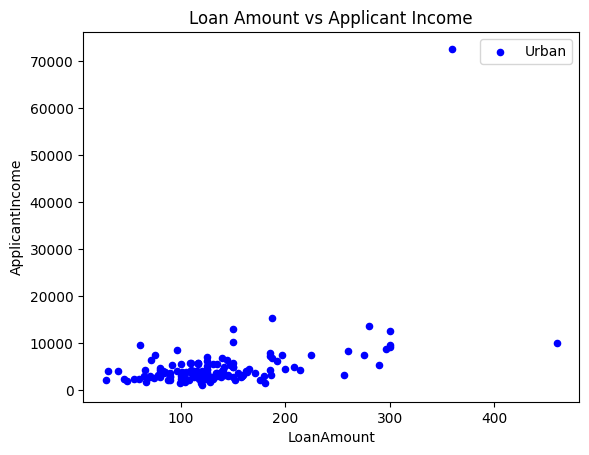

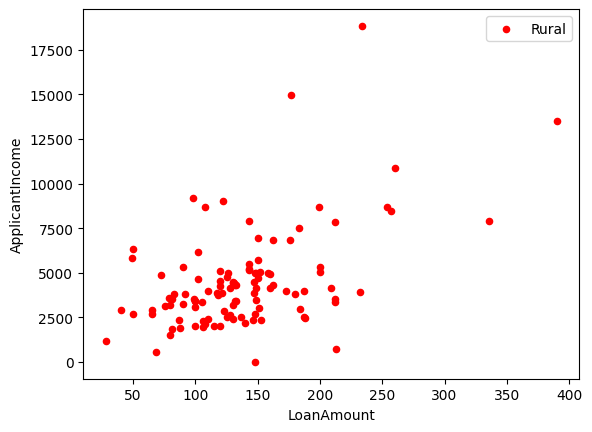

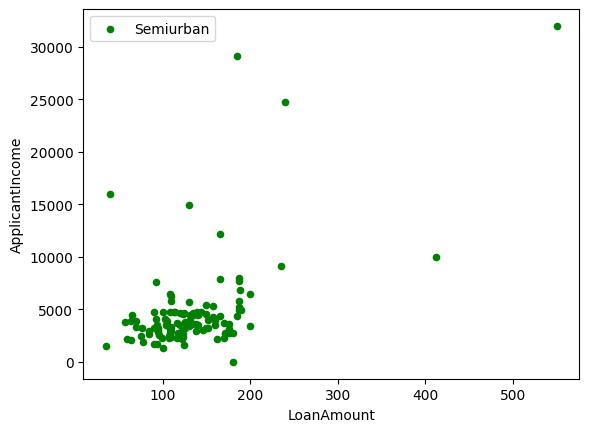

In [ ]:
fig = loan[loan.Property_Area=='Urban'].plot(kind='scatter',x='LoanAmount',y='ApplicantIncome',color='blue', label='Urban')
loan[loan.Property_Area=='Rural'].plot(kind='scatter',x='LoanAmount',y='ApplicantIncome',color='red', label='Rural')
loan[loan.Property_Area=='Semiurban'].plot(kind='scatter',x='LoanAmount',y='ApplicantIncome',color='green', label='Semiurban')
fig.set_title("Loan Amount vs Applicant Income")
plt.show()

**The below joint plot visualises the relation between applicant income and the loan amount**

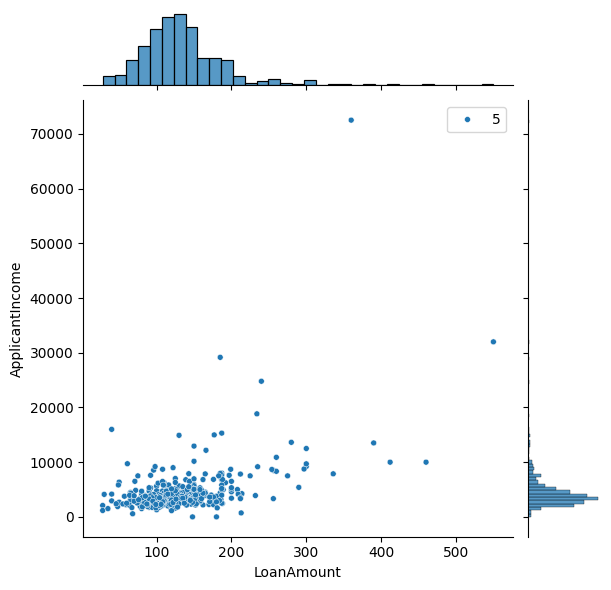

In [ ]:
sns.jointplot(x="LoanAmount", y="ApplicantIncome", data=loan, size=5)
plt.show()

**To describe and visualize the loan amount approved for an applicant based on the gender, use the below plot**

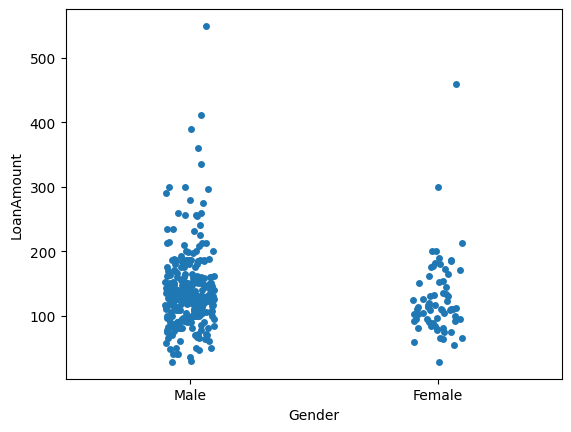

In [ ]:

sns.stripplot(y ='LoanAmount', x = 'Gender', data =loan)
plt.show()

**Below plot describes the income of an applicant based upon their gender**

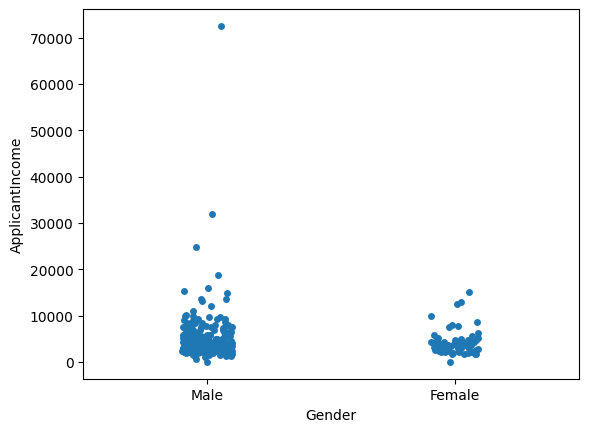

In [ ]:
sns.stripplot(y ='ApplicantIncome', x = 'Gender', data =loan)
plt.show()

**This boxplot visualizes the loan amount approved for educated and uneducated applicants**

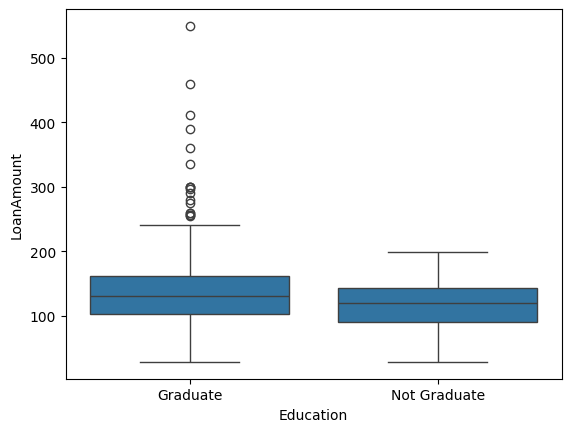

In [ ]:
sns.boxplot(x="Education", y="LoanAmount", data=loan)
plt.show()

**The below pairplot represents all the numerical columns based on whether applicant is married or not**

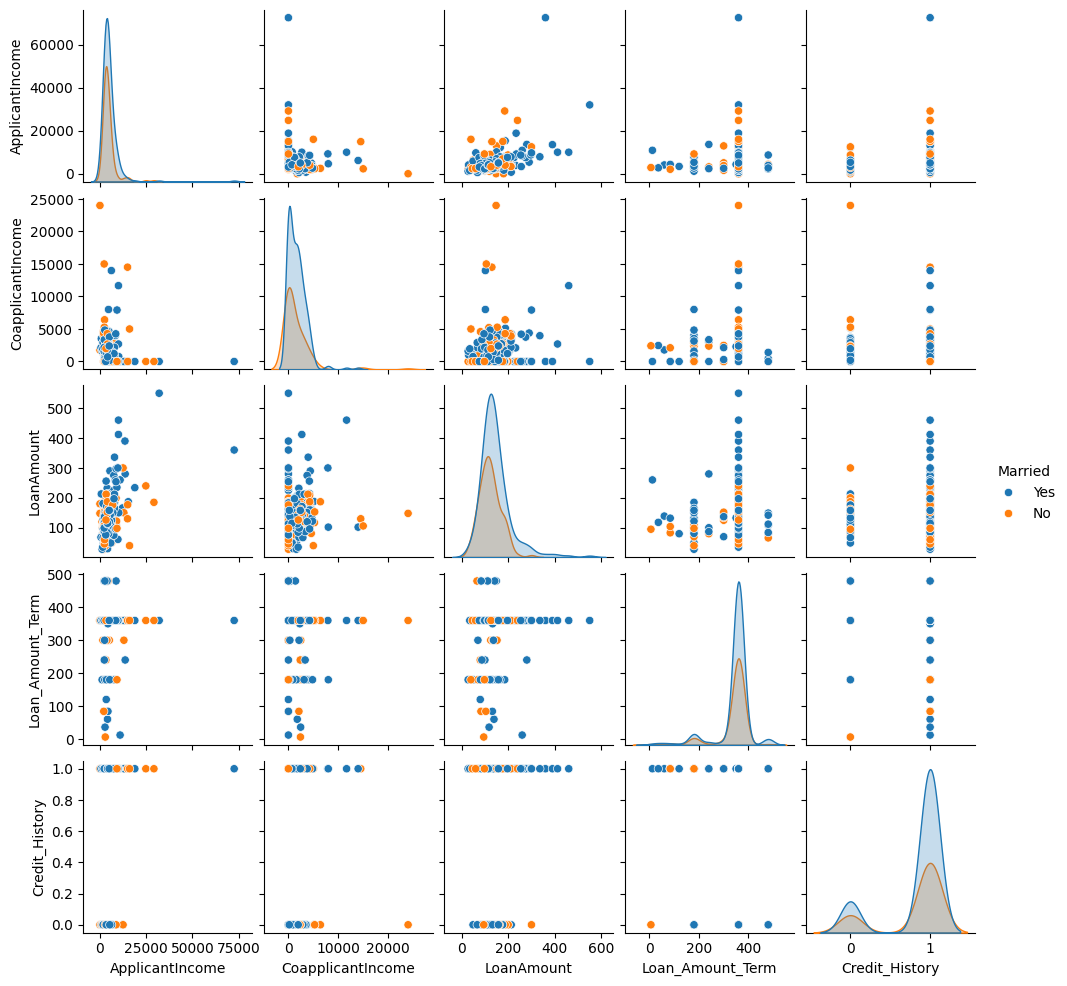

In [ ]:
sns.pairplot(data = loan, hue="Married", height=2)
plt.show()

**The below histogram shows all the 5 numerical columns statistics**

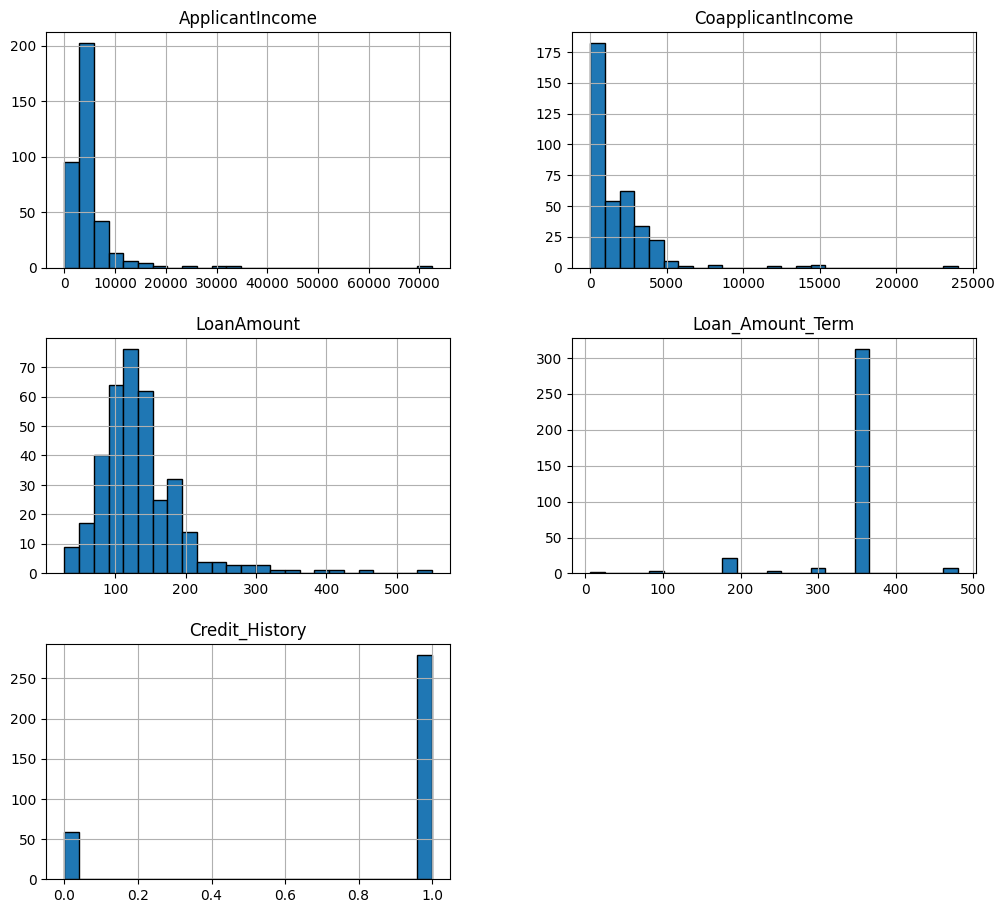

In [ ]:
loan.hist(edgecolor='black',bins = 25, figsize= (12,11))
plt.show()

**This categorical plot describes the employment of applicants based on their genders**

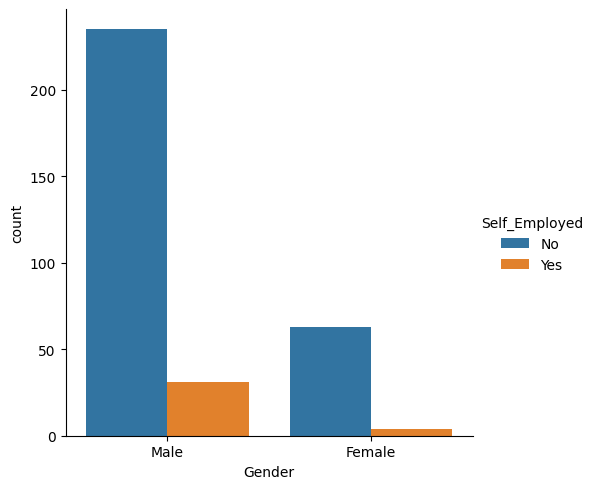

In [ ]:
sns.catplot(x ="Gender", hue ="Self_Employed", kind ="count", data = loan)

**Below heatmap summarizes the number of married and unmarried Self-Employed applicants**

<Axes: xlabel='Education', ylabel='Married-Self_Employed'>

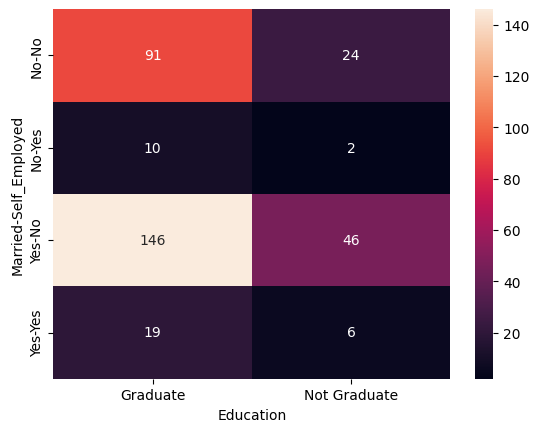

In [20]:
group = loan.groupby(['Married', 'Self_Employed','Education'])
grp = group.size().unstack()
sns.heatmap(grp, annot = True, fmt ="d")

**To plot the credit history of male and female applicants on the basis of their income we can follow this:**

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

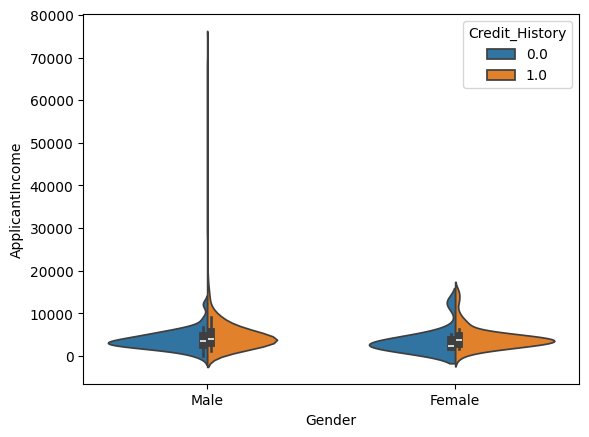

In [ ]:
sns.violinplot(x ="Gender", y ="ApplicantIncome", hue ="Credit_History",data = loan, split = True)

**The be low bar plot visualises the applicants martial status and their income based on the credit history of them.**

<Axes: xlabel='Married', ylabel='ApplicantIncome'>

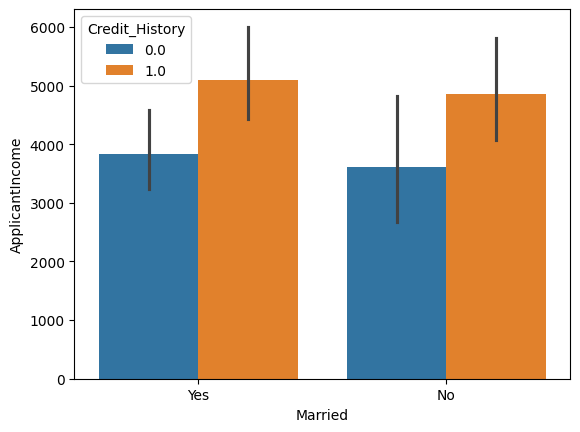

In [ ]:
sns.barplot(x ="Married", y ="ApplicantIncome", hue ="Credit_History",data = loan)

**To find out Credit_History of the applicants whether they are graduated or not graduated in all three areas i.e; Rural, Urban and Semiurban**

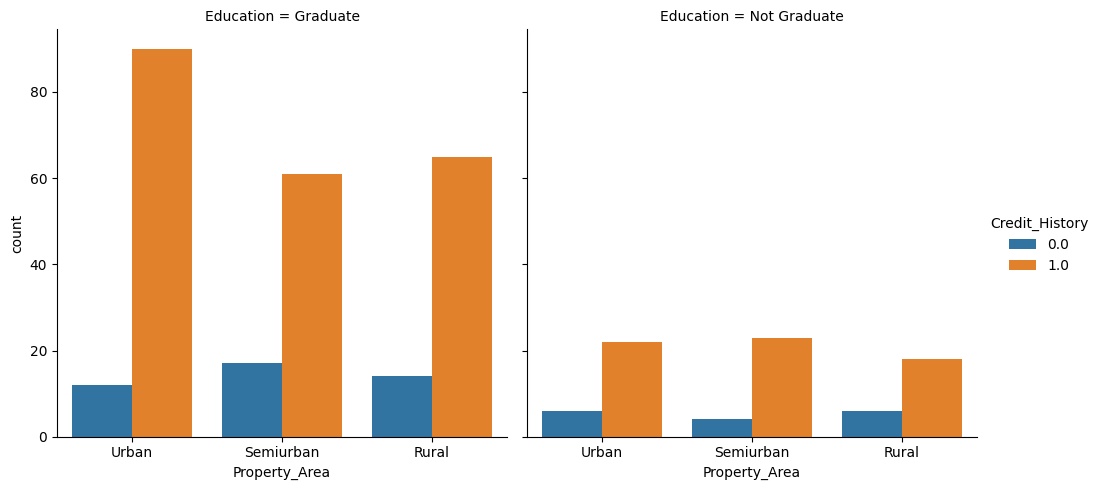

In [ ]:
sns.catplot(x ='Property_Area', hue ='Credit_History', kind ='count', col ='Education', data = loan)

###Conclusion :
**This notebook includes the insightful observations and visualizations of the loan applicants dataset.**

**The columns that can be dropped are:**

**Loan_ID, Dependents, Loan_Amount_Term: These aren't contributing much to the outcome so we can drop them.**

**The left over fields are sufficient to explore the patterns of loan approval.**